# import basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# importing dataset

In [3]:
data=pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# check info of dataset

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Checking the shape of Data


In [5]:
data.shape

(284807, 31)


# Pre-processing the data


In [6]:
#checking for null values
data.isnull().values.any()

False

There are no null values in the data



<AxesSubplot:xlabel='Time', ylabel='Density'>

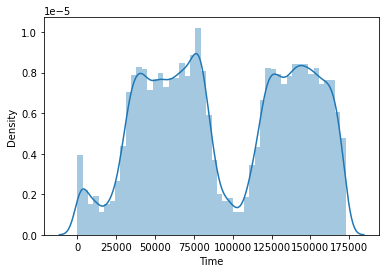

In [7]:
sns.distplot(data['Time'])

<AxesSubplot:xlabel='Amount', ylabel='Density'>

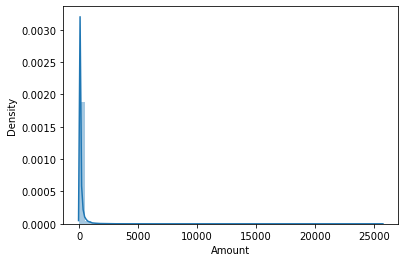

In [8]:
sns.distplot(data['Amount'])


# Checking number of records of each kind of transaction class (Fraud and Normal)


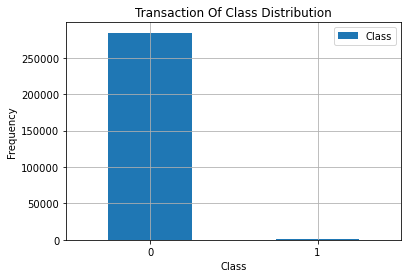

In [9]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Of Class Distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.show()

Get the Fraud and the normal dataset

In [10]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

The data set is highly imbalanced. Fraud(1) and Normal(0) transaction



In [11]:
fraud.shape



(492, 31)

In [12]:
normal.shape


(284315, 31)

# Checking the amount of money involved in each kind of transaction


In [13]:
#Fraud Transactions

fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
#Non Fraud i.e Normal Transaction

normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Graphical representation of Amount


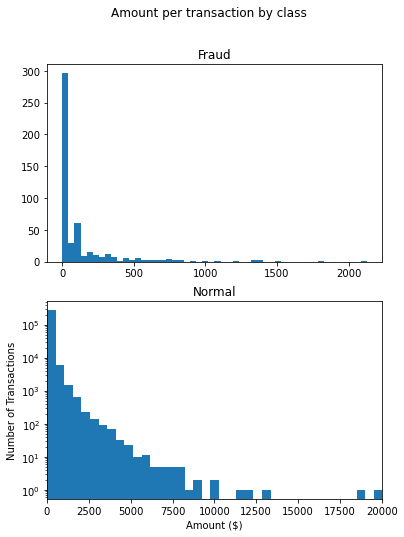

In [15]:
figure,(ax1, ax2) = plt.subplots(2,1, figsize=(6,8))
figure.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

# Plotting time of transaction to check for correlations


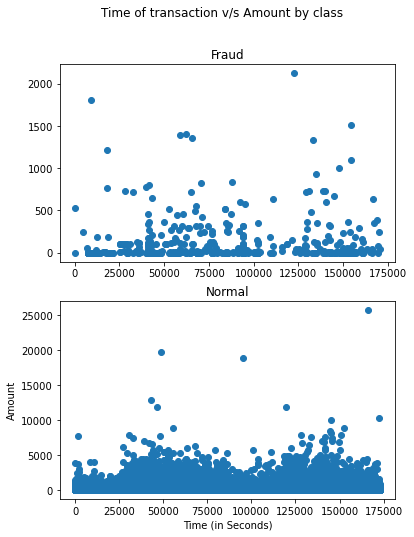

In [50]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,8))
figure.suptitle('Time of transaction v/s Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

# Now determine the number of fraud and valid (normal) transactions in the dataset


In [17]:
Fraud = data[data['Class']==1]

Valid = data[data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [18]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


# Correlation

<AxesSubplot:>

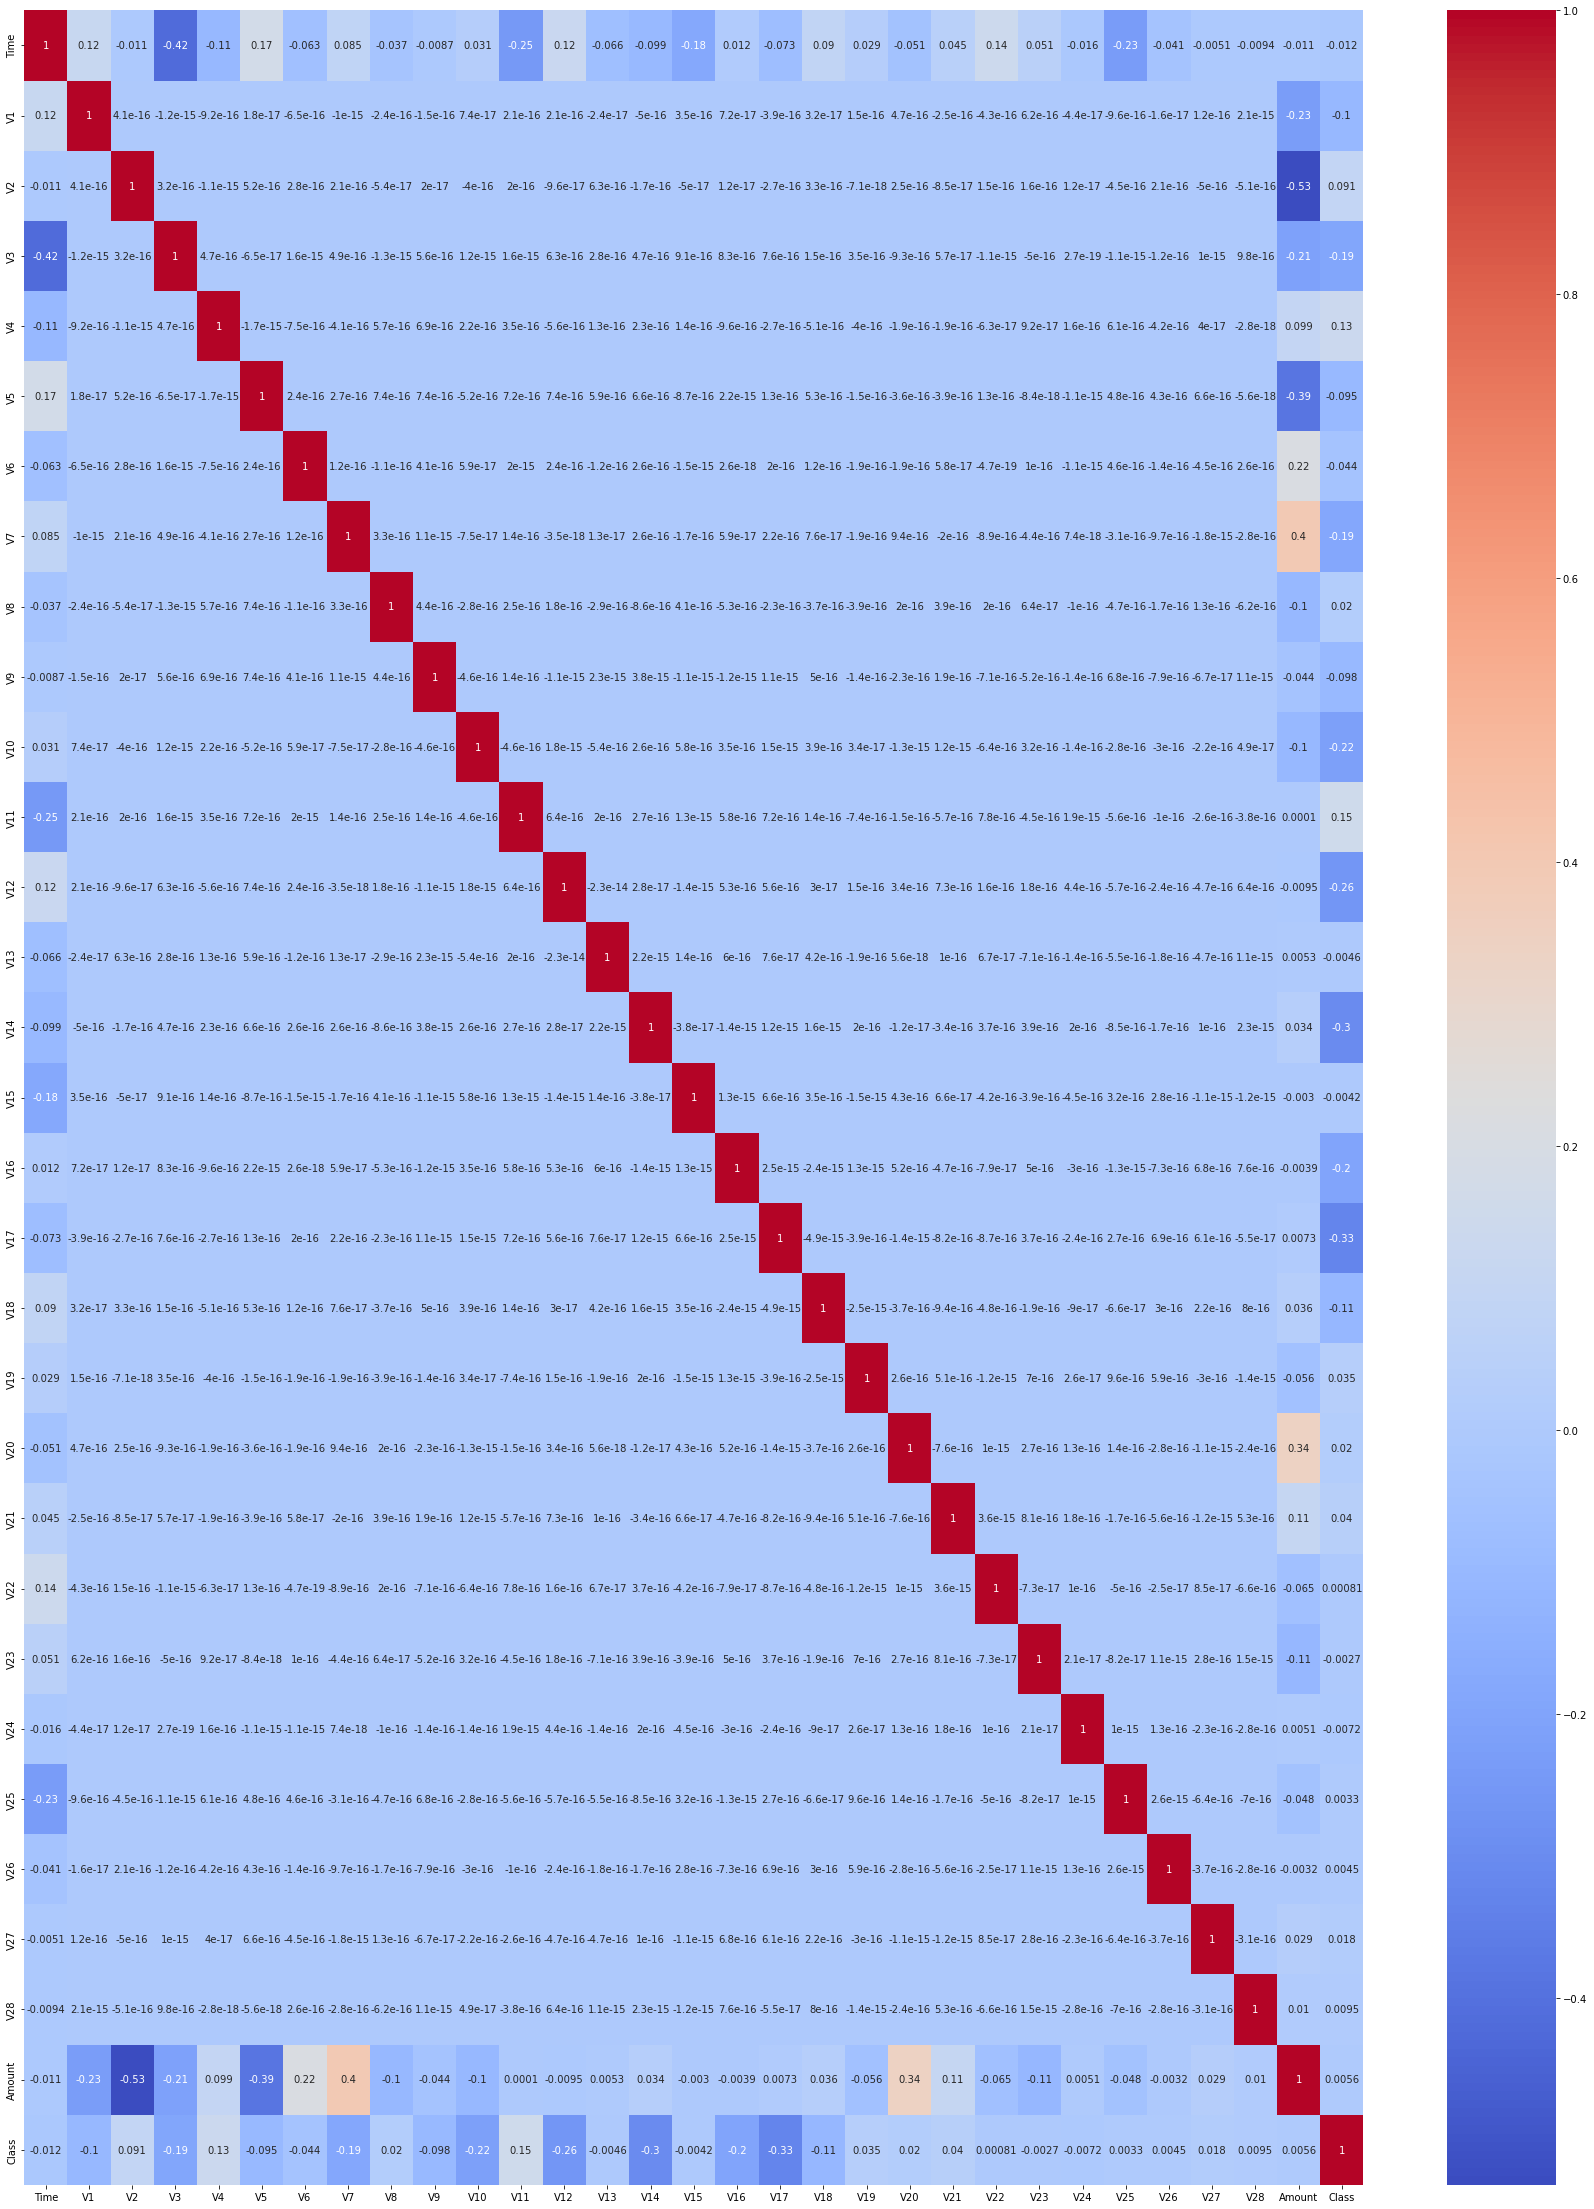

In [19]:
corr = data.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [22]:
X = data.drop(columns=['Class'], axis=1)
y = data['Class']

The numerical amount in fraud and normal cases differ highly, so we can scale them



# Scaling the Amount using Standard Scaler


In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [24]:
x_scaler[-1]


array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

# Credit Card Fraud Detection Prediction model


In [25]:
# Train Test Split

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

# Logistic Regression


In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# training
model.fit(x_train, y_train)

# testing
y_pred = model.predict(x_test)

print ("Classification Report:")
print(classification_report(y_test, y_pred))

print("F1 Score:",f1_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.63      0.72       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.719626168224299


# XG Boosting


In [27]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)

# training
model.fit(x_train, y_train)

# testing
y_pred = model.predict(x_test)

print ("Classification Report:")
print(classification_report(y_test, y_pred))

print("F1 Score:",f1_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.80      0.86       123

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.8634361233480178


# Class Imbalancement


<AxesSubplot:xlabel='Class', ylabel='count'>

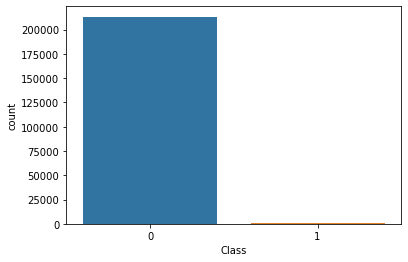

In [28]:
sns.countplot(y_train)


In [32]:
#Using combination of over sampling and under sampling to balance the class with equal distribution

from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

<AxesSubplot:xlabel='Class', ylabel='count'>

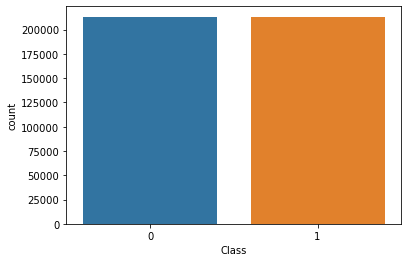

In [33]:
sns.countplot(y_smote)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)

print ("Classification Report:")
print(classification_report(y_test, y_pred))

print("F1 Score:",f1_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.98      0.99     71202

F1 Score: 0.11224489795918367


# XGB Classifier

In [38]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)

# training
model.fit(x_smote, y_smote)

# testing
y_pred = model.predict(x_test)

print ("Classification Report:")
print( classification_report(y_test, y_pred))

print("F1 Score:",f1_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.73      0.83      0.78       123

    accuracy                           1.00     71202
   macro avg       0.87      0.91      0.89     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.7786259541984732


# Decision Tree


In [39]:
print("x_train.shape : ", x_train.shape)
print("x_test.shape  : ", x_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape  : ", y_test.shape)

x_train.shape :  (213605, 30)
x_test.shape  :  (71202, 30)
y_train.shape :  (213605,)
y_test.shape  :  (71202,)


In [40]:
stdsc = StandardScaler()
x_train = stdsc.fit_transform(x_train)
x_test = stdsc.transform(x_test)

In [41]:
print("Training Set after Standardised : \n", x_train[0])

Training Set after Standardised : 
 [-1.38739851 -0.42803145 -0.31791508  1.14134333 -0.56936473 -0.14684643
 -0.05699602  0.04565553  0.2254286   0.47775827 -0.83148856  0.32402894
  1.03837852  0.08333485 -0.53671508 -1.91604116  0.38265298 -0.64596683
  0.1118911   0.29282412  0.31085044  0.06554625  0.01754325  0.56411242
  0.10330477 -1.67341115  1.36370595  0.1808567   0.57044223  0.08695233]


In [42]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [43]:
y_pred_decision_tree = dt_classifier.predict(x_test)


In [44]:
print("y_pred_decision_tree : \n", y_pred_decision_tree)


y_pred_decision_tree : 
 [0 0 0 ... 0 0 0]


In [45]:
from sklearn.metrics import confusion_matrix

decision = confusion_matrix(y_test, y_pred_decision_tree)
print("confusion Matrix : \n", decision)

confusion Matrix : 
 [[71051    28]
 [   28    95]]


In [46]:
Accuracy_Model = ((decision[0][0] + decision[1][1]) / decision.sum()) *100
print("Accuracy_Decison    : ", Accuracy_Model)

Error_rate_Model= ((decision[0][1] + decision[1][0]) / decision.sum()) *100
print("Error_rate_Decison  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (decision[1][1] / (decision[1][1] + decision[0][1])) *100
print("Specificity_Decison : ", Specificity_Model)

# True Genuine Rate
Sensitivity_Model = (decision[0][0] / (decision[0][0] + decision[1][0])) *100
print("Sensitivity_Decison : ", Sensitivity_Model)

Accuracy_Decison    :  99.92135052386169
Error_rate_Decison  :  0.07864947613831072
Specificity_Decison :  77.23577235772358
Sensitivity_Decison :  99.96060721169403
